In [4]:
import cv2
import matplotlib.pyplot as plt

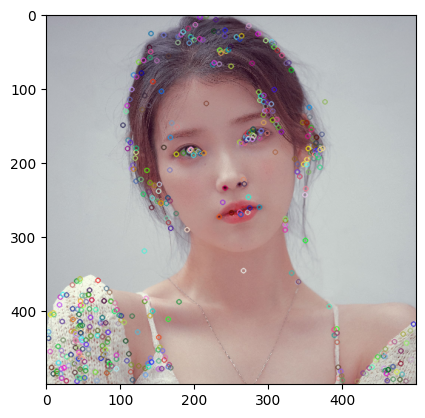

In [5]:
img = cv2.imread('./data/IU.jpg')
img = cv2.resize(img, (500,500))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# SIFT 객체 생성
sift = cv2.SIFT_create()

# 키포인트 검출 및 특징 디스크립터 계산
keypoints, descriptors = sift.detectAndCompute(gray, None)

# 키포인트 그리기
img_with_keypoints = cv2.drawKeypoints(img, keypoints, None)

plt.imshow(img_with_keypoints)
plt.show()

Distance:  0.0
Keypoints 1: (x=2, y=432)
Keypoints 2: (x=66, y=2)

Distance:  0.0
Keypoints 1: (x=2, y=426)
Keypoints 2: (x=73, y=2)

Distance:  0.0
Keypoints 1: (x=3, y=437)
Keypoints 2: (x=61, y=3)

Distance:  0.0
Keypoints 1: (x=3, y=429)
Keypoints 2: (x=70, y=3)

Distance:  0.0
Keypoints 1: (x=5, y=455)
Keypoints 2: (x=43, y=5)

Distance:  0.0
Keypoints 1: (x=5, y=405)
Keypoints 2: (x=93, y=5)

Distance:  0.0
Keypoints 1: (x=7, y=477)
Keypoints 2: (x=22, y=7)

Distance:  0.0
Keypoints 1: (x=9, y=485)
Keypoints 2: (x=13, y=9)

Distance:  0.0
Keypoints 1: (x=9, y=403)
Keypoints 2: (x=96, y=9)

Distance:  0.0
Keypoints 1: (x=14, y=482)
Keypoints 2: (x=17, y=14)



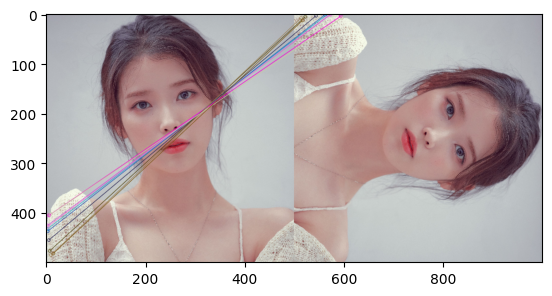

In [15]:
img2 = cv2.imread('./data/IU.jpg')
img2 = cv2.resize(img2, (500,500))
img2 = cv2.rotate(img2, cv2.ROTATE_90_CLOCKWISE)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# 키포인트 매칭
matcher = cv2.BFMatcher()
matches = matcher.match(descriptors, descriptors2)

# 매칭 결과 정렬
matches = sorted(matches, key=lambda x: x.distance)

for match in matches[:10]:
    print('Distance: ', match.distance)
    print('Keypoints 1: (x=%d, y=%d)' % (int(keypoints[match.queryIdx].pt[0]), int(keypoints[match.queryIdx].pt[1])))
    print('Keypoints 2: (x=%d, y=%d)' % (int(keypoints2[match.trainIdx].pt[0]), int(keypoints2[match.trainIdx].pt[1])))
    print()
    
matched_img = cv2.drawMatches(img, keypoints, img2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(matched_img)
plt.show()